# 1. Importing needed libraries

In [72]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# 2. Read data and data overview

In [73]:
data = pd.read_csv('Churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [74]:
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [75]:
# Get data info to define missing values and data types for the DataSet
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
customerID          7043 non-null object
gender              7043 non-null object
SeniorCitizen       7043 non-null int64
Partner             7043 non-null object
Dependents          7043 non-null object
tenure              7043 non-null int64
PhoneService        7043 non-null object
MultipleLines       7043 non-null object
InternetService     7043 non-null object
OnlineSecurity      7043 non-null object
OnlineBackup        7043 non-null object
DeviceProtection    7043 non-null object
TechSupport         7043 non-null object
StreamingTV         7043 non-null object
StreamingMovies     7043 non-null object
Contract            7043 non-null object
PaperlessBilling    7043 non-null object
PaymentMethod       7043 non-null object
MonthlyCharges      7043 non-null float64
TotalCharges        7043 non-null object
Churn               7043 non-null object
dtypes: float64(1), int64(2), obj

Do not have any missing values and it's good 

In [76]:
# Define unique values and not unique to define categorical and non categorical features
data.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

Monthly Charges and Total Charges are quantitative. All another attributes are categorical 

In [77]:
data = data.drop('customerID', 1)

# 4. Data analyze

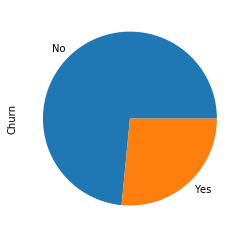

In [78]:
# Churn and not churn customers
data['Churn'].value_counts().plot.pie()

In [79]:
data['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

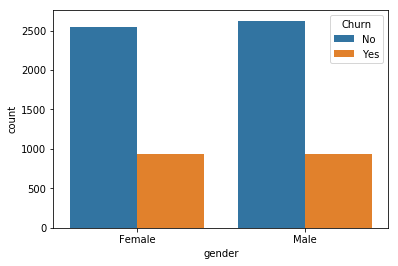

In [80]:
# Churn and not Churn depending on gender
sns.countplot(x='gender', hue='Churn', data=data)

Gender do not effects on Churn almost

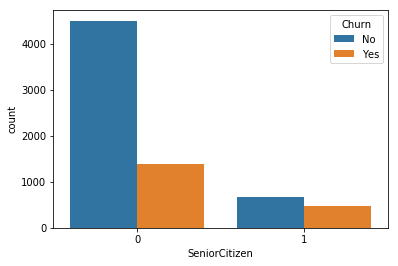

In [81]:
# Churn and not Churn depending on SeniorCitizen
sns.countplot(x='SeniorCitizen', hue='Churn', data=data)

For SeniorCitizer ralation churn is higher

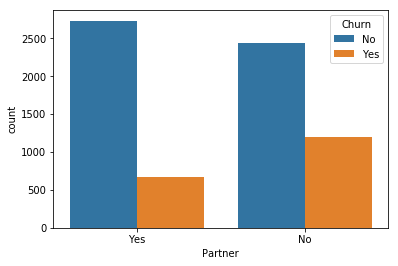

In [82]:
# Churn and not Churn depending on Partner
sns.countplot(x='Partner', hue='Churn', data=data)

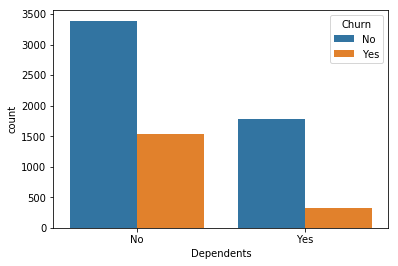

In [83]:
# Churn and not Churn depending on Dependents
sns.countplot(x='Dependents', hue='Churn', data=data)

In [84]:
"""# Create the function to build all dependencies for categorical attributs
def cat_countplot(data, hue, out_fn_template="charts\{}.jpg", **fig_parms):
    for col in data.columns:
        fig = plt.figure(**fig_parms)
        sns.countplot(x=col, hue=hue, data=data)
        plt.savefig(out_fn_template.format(str(col)))
        plt.close()
# Apply the function 
cat_countplot(data, 'Churn')"""

'# Create the function to build all dependencies for categorical attributs\ndef cat_countplot(data, hue, out_fn_template="charts\\{}.jpg", **fig_parms):\n    for col in data.columns:\n        fig = plt.figure(**fig_parms)\n        sns.countplot(x=col, hue=hue, data=data)\n        plt.savefig(out_fn_template.format(str(col)))\n        plt.close()\n# Apply the function \ncat_countplot(data, \'Churn\')'

All charts can be found in the folder "charts (Customer_Churn_Prediction/charts)"

# 5. Prepare the model 

Attributes in X should be divided on numeric and categorical. It allows not to lose dependencies in numeric and use one-hot-encoding for categorical

In [85]:
data_no_one_hot_enc = ['MonthlyCharges','TotalCharges', 'Churn']
data_col = data.columns
data_with_one_hot_enc = data_col.difference(data_no_one_hot_enc)
data_with_one_hot_enc

Index(['Contract', 'Dependents', 'DeviceProtection', 'InternetService',
       'MultipleLines', 'OnlineBackup', 'OnlineSecurity', 'PaperlessBilling',
       'Partner', 'PaymentMethod', 'PhoneService', 'SeniorCitizen',
       'StreamingMovies', 'StreamingTV', 'TechSupport', 'gender', 'tenure'],
      dtype='object')

In [86]:
data['TotalCharges'] = pd.to_numeric(data['TotalCharges'], errors="coerce") # we have some str in 'TotalCharges'

In [87]:
X_hot_enc = data[data_with_one_hot_enc] # datadrame for transformation using one-hot-encoding

In [88]:
# Use one-fot encoding to transform string attributes in numbers 
from sklearn.preprocessing import OneHotEncoder
onehotencoder = OneHotEncoder()
X_hot_enc = onehotencoder.fit_transform(X_hot_enc).toarray()

In [89]:
X_hot_enc

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])

In [90]:
X_hot_enc = pd.DataFrame(X_hot_enc) # transformation to DataFrame

In [91]:
data['Churn'] = data['Churn'].map({"Yes":1, "No":0})

In [92]:
data_transrormed = pd.concat([X_hot_enc, data[['MonthlyCharges', 'TotalCharges', 'Churn']]], axis=1)

In [93]:
data_transrormed.head()

,0,1,2,3,4,5,6,7,8,9,...,109,110,111,112,113,114,115,MonthlyCharges,TotalCharges,Churn
0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29.85,29.85,0
1,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,56.95,1889.50,0
2,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,53.85,108.15,1
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,42.30,1840.75,0
4,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,70.70,151.65,1


In [94]:
data_transrormed.shape

(7043, 119)

In [95]:
# Drop NaN values from the DataFrame
data_final = data_transrormed.dropna()

In [96]:
data_final.shape

(7032, 119)

In [97]:
y = data_final['Churn']
X = data_final.drop('Churn', axis=1)

In [98]:
# Create Train & Test Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

# 6. Train logistic regression. Select the best params for Logistic regression 

In [99]:
from sklearn.linear_model import LogisticRegression

In [100]:
C_param_range = [0.00001,0.0001,0.001,0.01,0.1,1,10,100]
pen_params = ['l1', 'l2']

In [101]:
# Create the array with all parameters using accuracy, precision, recall
params_array = []
for i in C_param_range:
    for k in pen_params:
        model = LogisticRegression(penalty=k,C=i)
        result = model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        params_array.append([k, i, metrics.accuracy_score(y_test, y_pred), metrics.precision_score(y_test, y_pred),
                           metrics.recall_score(y_test, y_pred)])
print(params_array)

[['l1', 1e-05, 0.7559726962457338, 0.0, 0.0], ['l2', 1e-05, 0.7508532423208191, 0.49002217294900224, 0.5151515151515151], ['l1', 0.0001, 0.7559726962457338, 0.0, 0.0], ['l2', 0.0001, 0.7929465301478953, 0.5920679886685553, 0.48717948717948717], ['l1', 0.001, 0.7400455062571104, 0.47058823529411764, 0.5221445221445221], ['l2', 0.001, 0.8122866894197952, 0.6666666666666666, 0.46153846153846156], ['l1', 0.01, 0.8065984072810012, 0.657243816254417, 0.43356643356643354], ['l2', 0.01, 0.8168373151308305, 0.6636085626911316, 0.5058275058275058], ['l1', 0.1, 0.8225255972696246, 0.6695652173913044, 0.5384615384615384], ['l2', 0.1, 0.8225255972696246, 0.667621776504298, 0.5431235431235432], ['l1', 1, 0.8213879408418657, 0.6666666666666666, 0.5361305361305362], ['l2', 1, 0.823094425483504, 0.672514619883041, 0.5361305361305362], ['l1', 10, 0.8191126279863481, 0.6590257879656161, 0.5361305361305362], ['l2', 10, 0.825938566552901, 0.6732394366197183, 0.5571095571095571], ['l1', 100, 0.8179749715585

In [102]:
# Select the best paramatest based on accuracy 
max_accur = params_array[0][2]
max_ind = 0
for i,k in enumerate(params_array):
    if params_array[i][2]>max_accur:
        max_accur = params_array[i][2]
        max_ind = i
print ("penalty:", params_array[max_ind][0])
print ("C:", params_array[max_ind][1])
print("Accuracy:",params_array[max_ind][2])
print("Precision:",params_array[max_ind][3])
print("Recall:",params_array[max_ind][4])

penalty: l2
C: 10
Accuracy: 0.825938566552901
Precision: 0.6732394366197183
Recall: 0.5571095571095571


The best params are penalty = l2, C = 10

# 7. Create confusion matrix and define ROC AUC

In [103]:
model_best = LogisticRegression(penalty='l2',C=10)
result = model_best.fit(X_train, y_train)
y_pred = model_best.predict(X_test)

In [104]:
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[1213,  116],
       [ 190,  239]], dtype=int64)

Text(0.5, 257.44, 'Predicted label')

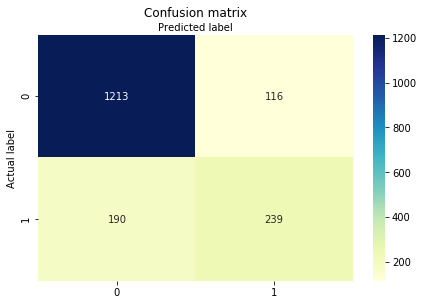

In [105]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

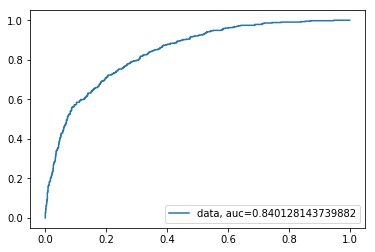

In [106]:
y_pred_proba = model_best.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# 8. Conclusion

The best model for the Customer Churn prediction is the model with the next params: 
- C = 10
- penalty = 'l2'
- Accuracy: 0.825
- Precision: 0.673
- Recall: 0.557